<a href="https://colab.research.google.com/github/arnavxyz/EDA_Optimising_NYC_Taxis_Arnav_Dubey/blob/main/EDA_Assg_NYC_Taxi_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # Take a small percentage of entries from each hour of every date.
# # Iterating through the monthly data:
# #   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# # Create a single dataframe for the year combining all the monthly data

# # Select the folder having data files
# import os

# # Select the folder having data files
# os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# # Create a list of all the twelve files to read
# file_list = os.listdir()

# # initialise an empty dataframe
# df = pd.DataFrame()


# # iterate through the list of files and sample one by one:
# for file_name in file_list:
#     try:
#         # file path for the current file
#         file_path = os.path.join(os.getcwd(), file_name)

#         # Reading the current file



#         # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
#         # After completing iteration through each date, we will append this data to the final dataframe.
#         sampled_data = pd.DataFrame()

#         # Loop through dates and then loop through every hour of each date

#             # Iterate through each hour of the selected date

#                 # Sample 5% of the hourly data randomly

#                 # add data of this hour to the dataframe

#         # Concatenate the sampled data of all the dates to a single dataframe
#         df = # we initialised this empty DF earlier

#     except Exception as e:
#         print(f"Error reading file {file_name}: {e}")

In [9]:
import glob

# List all Parquet files from January to December
file_paths = [f"/content/2023-{i}.parquet" for i in range(1, 13)]

# Initialize an empty list to store sampled data
sampled_dfs = []

for file in file_paths:
    print(f"Processing {file}...")

    # Load the Parquet file
    df = pd.read_parquet(file, engine="pyarrow")

    # Extract date and hour from the pickup datetime
    df["pickup_date"] = df["tpep_pickup_datetime"].dt.date
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

    # Group by date and hour, then sample 5% from each group
    sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))

    # Append sampled data to the list
    sampled_dfs.append(sampled_df)

# Concatenate all sampled data into a final dataset
final_sampled_df = pd.concat(sampled_dfs, ignore_index=True)

# Save to a new Parquet file
final_sampled_df.to_parquet("/content/sampled_nyc_taxi_2023.parquet", engine="pyarrow")

print("Sampling complete. Final dataset saved at /content/sampled_nyc_taxi_2023.parquet")


Processing /content/2023-1.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing /content/2023-2.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing /content/2023-3.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing /content/2023-4.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing /content/2023-5.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing /content/2023-6.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing /content/2023-7.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing /content/2023-8.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing /content/2023-9.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing /content/2023-10.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing /content/2023-11.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing /content/2023-12.parquet...


<ipython-input-9-49ecb014ae68>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["pickup_date", "pickup_hour"], group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))


Sampling complete. Final dataset saved at /content/sampled_nyc_taxi_2023.parquet


In [24]:
final_sampled_df.to_csv("/content/sampled_nyc_taxi_2023.csv", index=False)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# df.head()

In [ ]:
# Load the new data file
final_sampled_df.head()

In [12]:
# df.info()
final_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [20]:
# Fix the index and drop any columns that are not needed

# Reset index
final_sampled_df.reset_index(drop=True, inplace=True)

# Check percentage of missing values in each column
missing_values = final_sampled_df.isnull().mean() * 100
print(missing_values[missing_values > 50])  # Show columns with more than 50% missing values

airport_fee    92.17027
dtype: float64


In [22]:
final_sampled_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour
count,1.896400e+06,1896400,1896400,1.831526e+06,1.896400e+06,1.831526e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.831526e+06,1.831526e+06,1.896400e+06
mean,1.733026e+00,2023-07-02 19:59:52.930795,2023-07-02 20:17:18.919562,1.369215e+00,3.858293e+00,1.634694e+00,1.652814e+02,1.640515e+02,1.163817e+00,1.991935e+01,1.588018e+00,4.952796e-01,3.547011e+00,5.965338e-01,9.989706e-01,2.898186e+01,2.307524e+00,1.428976e-01,1.426504e+01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+00,-5.000000e-01,0.000000e+00,0.000000e+00,-1.000000e+00,-5.750000e+00,-2.500000e+00,-1.750000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00,1.100000e+01
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00,1.500000e+01
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00,1.900000e+01
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00,2.300000e+01
std,4.476401e-01,NaN,NaN,8.927560e-01,1.294085e+02,7.393915e+00,6.400038e+01,6.980207e+01,5.081384e-01,1.055371e+02,1.829200e+00,4.885128e-02,4.054882e+00,2.187878e+00,3.112072e-02,1.064162e+02,6.667267e-01,4.648725e-01,5.807381e+00


In [26]:
final_sampled_df.drop(columns=["tpep_pickup_datetime"], inplace=True, errors='ignore')

# Verify the column is dropped
final_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_dropoff_datetime  datetime64[us]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   store_and_fwd_flag     object        
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  pickup_date           

In [28]:
# Ensure the column is in datetime format
final_sampled_df["tpep_dropoff_datetime"] = pd.to_datetime(final_sampled_df["tpep_dropoff_datetime"])

# Extract drop-off date and time into new columns
final_sampled_df["dropoff_date"] = final_sampled_df["tpep_dropoff_datetime"].dt.date
final_sampled_df["dropoff_time"] = final_sampled_df["tpep_dropoff_datetime"].dt.time

# Drop the original datetime column
final_sampled_df.drop(columns=["tpep_dropoff_datetime"], inplace=True, errors='ignore')

# Verify changes
final_sampled_df.info()
final_sampled_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   store_and_fwd_flag     object 
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           int64  
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  congestion_surcharge   float64
 16  airport_fee            float64
 17  pickup_date            object 
 18  pickup_hour            int32  
 19  dropoff_date           object 
 20  dropoff_time           object 
dtypes: float64(12), int32(1), int64(4), object(4)
memory u

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,dropoff_date,dropoff_time
0,2,1.0,0.86,1.0,N,141,140,1,6.5,1.0,...,2.00,0.0,1.0,13.50,2.5,0.00,2022-12-31,23,2022-12-31,23:56:06
1,2,1.0,7.74,1.0,N,138,256,2,32.4,6.0,...,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,2023-01-01,00:23:15
2,2,2.0,1.24,1.0,N,161,237,1,7.9,1.0,...,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,2023-01-01,00:21:46
3,2,3.0,1.44,1.0,N,237,141,2,11.4,1.0,...,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,2023-01-01,00:24:36
4,2,1.0,0.54,1.0,N,143,142,2,6.5,1.0,...,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,2023-01-01,00:29:55


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [21]:
# Combine the two airport fee columns

# Combine the two columns, prioritizing non-null values
final_sampled_df["airport_fee"] = final_sampled_df["airport_fee"].fillna(final_sampled_df["Airport_fee"])

# Drop the redundant column
final_sampled_df.drop(columns=["Airport_fee"], inplace=True, errors='ignore')

# Verify changes
final_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [29]:
# check where values of fare amount are negative

# Filter rows where fare_amount is negative
negative_fares = final_sampled_df[final_sampled_df["fare_amount"] < 0]

# Display the results
print(f"Number of negative fare values: {len(negative_fares)}")
negative_fares.head()

Number of negative fare values: 0


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,dropoff_date,dropoff_time


Did you notice something different in the `RatecodeID` column for above records?

In [30]:
# Analyse RatecodeID for the negative fare amounts

# Filter rows where fare_amount is negative
negative_fares = final_sampled_df[final_sampled_df["fare_amount"] < 0]

# Analyze RatecodeID distribution for negative fare amounts
ratecode_analysis = negative_fares["RatecodeID"].value_counts()

# Display results
print("RatecodeID distribution for negative fare amounts:")
print(ratecode_analysis)

RatecodeID distribution for negative fare amounts:
Series([], Name: count, dtype: int64)


In [32]:
# Find which columns have negative values

# Select only numeric columns
numeric_cols = final_sampled_df.select_dtypes(include=["number"])

# Find columns with negative values
negative_columns = numeric_cols.loc[:, (numeric_cols < 0).any()].columns

# Display results
print("Columns with negative values:")
print(negative_columns)

Columns with negative values:
Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [33]:
# fix these negative values

# Fix negative values
for col in negative_columns:
    if col in ["fare_amount", "total_amount", "tip_amount", "tolls_amount", "congestion_surcharge"]:
        # Set invalid fare-related values to NaN
        final_sampled_df[col] = final_sampled_df[col].mask(final_sampled_df[col] < 0, None)
    elif col in ["trip_distance", "passenger_count"]:
        # Convert to absolute values
        final_sampled_df[col] = final_sampled_df[col].abs()

# Verify changes
print("Fixed negative values in columns:", negative_columns)
final_sampled_df.info()

Fixed negative values in columns: Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   store_and_fwd_flag     object 
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           int64  
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  congestion_surcharge   float64
 16  airport_fee            float64
 17  pickup_date            obje

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [39]:
# Find the proportion of missing values in each column

# Calculate the proportion of missing values in each column
missing_proportion = final_sampled_df.isnull().mean()

# Display results
print("Proportion of missing values in each column:")
print(missing_proportion)

Proportion of missing values in each column:
VendorID                 0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
store_and_fwd_flag       0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000041
congestion_surcharge     0.034239
airport_fee              0.034209
pickup_date              0.000000
pickup_hour              0.000000
dropoff_date             0.000000
dropoff_time             0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [40]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

# Display rows with null values
null_rows = final_sampled_df[final_sampled_df.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

# Impute NaN values in 'passenger_count' with the median value
final_sampled_df["passenger_count"].fillna(final_sampled_df["passenger_count"].median(), inplace=True)

# Verify changes
print("\nMissing values after imputation:")
print(final_sampled_df["passenger_count"].isnull().sum())

Rows with null values:
         VendorID  passenger_count  trip_distance  RatecodeID  \
5               2              NaN          19.24         NaN   
16              2              NaN          10.77         NaN   
43              2              NaN           4.52         NaN   
44              2              NaN           9.19         NaN   
47              2              NaN           2.74         NaN   
...           ...              ...            ...         ...   
1896375         2              NaN           4.10         NaN   
1896379         2              NaN           3.24         NaN   
1896390         2              NaN           8.38         NaN   
1896392         2              NaN           0.76         NaN   
1896398         1              NaN           0.00         NaN   

        store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
5                     None            66           107             0   
16                    None           151           1

<ipython-input-40-56e0236e6170>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_sampled_df["passenger_count"].fillna(final_sampled_df["passenger_count"].median(), inplace=True)


Did you find zeroes in passenger_count? Handle these.

In [41]:
# Find median passenger count (ignoring NaNs)
median_passengers = final_sampled_df["passenger_count"].median()

# Impute NaN values with median
final_sampled_df["passenger_count"].fillna(median_passengers, inplace=True)

# Replace zero values with median
final_sampled_df.loc[final_sampled_df["passenger_count"] == 0, "passenger_count"] = median_passengers

# Verify changes
print("Missing values after imputation:", final_sampled_df["passenger_count"].isnull().sum())
print("Zero values after replacement:", (final_sampled_df["passenger_count"] == 0).sum())

Missing values after imputation: 0
Zero values after replacement: 0


<ipython-input-41-8f916217e5cc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_sampled_df["passenger_count"].fillna(median_passengers, inplace=True)


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [42]:
# Fix missing values in 'RatecodeID'

# Check the most frequent RatecodeID (mode)
mode_ratecode = final_sampled_df["RatecodeID"].mode()[0]

# Impute missing values with mode
final_sampled_df["RatecodeID"].fillna(mode_ratecode, inplace=True)

# Verify changes
print("Missing values after imputation:", final_sampled_df["RatecodeID"].isnull().sum())

Missing values after imputation: 0


<ipython-input-42-f7fa081323c8>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_sampled_df["RatecodeID"].fillna(mode_ratecode, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [43]:
# handle null values in congestion_surcharge

# Check mode and median of congestion_surcharge
mode_congestion = final_sampled_df["congestion_surcharge"].mode()[0]
median_congestion = final_sampled_df["congestion_surcharge"].median()

# Choose an imputation strategy (mode or median)
final_sampled_df["congestion_surcharge"].fillna(mode_congestion, inplace=True)

# Verify changes
print("Missing values after imputation:", final_sampled_df["congestion_surcharge"].isnull().sum())

Missing values after imputation: 0


<ipython-input-43-e2ed278ba4e7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_sampled_df["congestion_surcharge"].fillna(mode_congestion, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [44]:
# Handle any remaining missing values

# Check the total missing values in each column
missing_values = final_sampled_df.isnull().sum()
print("Missing values before handling:\n", missing_values)

# Impute missing values based on column type
for col in final_sampled_df.columns:
    if final_sampled_df[col].dtype == "object":
        # Fill categorical columns with mode (most frequent value)
        final_sampled_df[col].fillna(final_sampled_df[col].mode()[0], inplace=True)
    else:
        # Fill numerical columns with median
        final_sampled_df[col].fillna(final_sampled_df[col].median(), inplace=True)

# Verify changes
print("\nMissing values after handling:\n", final_sampled_df.isnull().sum())

Missing values before handling:
 VendorID                     0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                78
congestion_surcharge         0
airport_fee              64874
pickup_date                  0
pickup_hour                  0
dropoff_date                 0
dropoff_time                 0
dtype: int64


<ipython-input-44-50b8da56a15f>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_sampled_df[col].fillna(final_sampled_df[col].median(), inplace=True)
<ipython-input-44-50b8da56a15f>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val


Missing values after handling:
 VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
pickup_date              0
pickup_hour              0
dropoff_date             0
dropoff_time             0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

Dataset Summary:
            VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.896400e+06     1.896400e+06   1.896400e+06  1.896400e+06   
mean   1.733026e+00     1.372236e+00   3.858293e+00  1.612981e+00   
std    4.476401e-01     8.644038e-01   1.294085e+02  7.267261e+00   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   1.263605e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.652814e+02  1.640515e+02  1.163817e+00  1.991935e+01  1.588018e+00   
std    6.400038e+01  6.980207e+01  5.081384e-01  1.055371e+02  1.829200e+00   
min    1.000000e+00  1.000000e+00  0.000000e

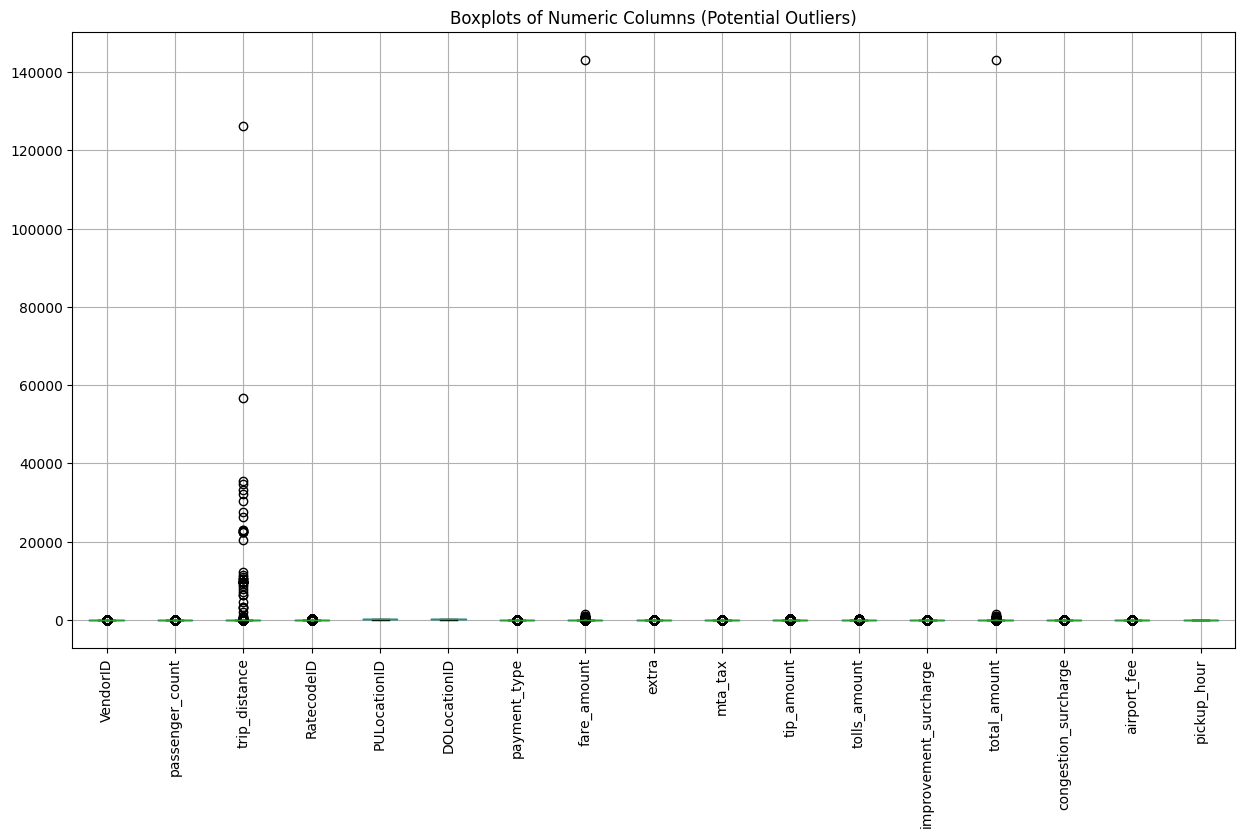

In [45]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# 1. Describe the dataset
print("Dataset Summary:\n", final_sampled_df.describe())

# 2. Detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Select numeric columns for outlier detection
numeric_cols = final_sampled_df.select_dtypes(include=["number"]).columns

# Detect outliers for all numeric columns
outlier_dict = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(final_sampled_df, col)
    outlier_dict[col] = len(outliers)

# Print columns with outliers
print("\nPotential outliers detected:")
for col, count in outlier_dict.items():
    if count > 0:
        print(f"{col}: {count} outliers")

# 3. Visualize potential outliers using boxplots
plt.figure(figsize=(15, 8))
final_sampled_df[numeric_cols].boxplot(rot=90)
plt.title("Boxplots of Numeric Columns (Potential Outliers)")
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [46]:
# remove passenger_count > 6

# Remove rows where passenger_count > 6
final_sampled_df = final_sampled_df[final_sampled_df["passenger_count"] <= 6]

# Drop trips where trip_distance is near 0 but fare_amount is more than $300
final_sampled_df = final_sampled_df[~((final_sampled_df["trip_distance"] <= 0.1) & (final_sampled_df["fare_amount"] > 300))]

# Drop trips where trip_distance = 0 and fare_amount = 0 but different pickup & dropoff zones
final_sampled_df = final_sampled_df[~((final_sampled_df["trip_distance"] == 0) &
                                      (final_sampled_df["fare_amount"] == 0) &
                                      (final_sampled_df["PULocationID"] != final_sampled_df["DOLocationID"]))]

# Drop trips where trip_distance > 250 miles (highly unrealistic for NYC)
final_sampled_df = final_sampled_df[final_sampled_df["trip_distance"] <= 250]

# Drop rows where payment_type is 0 (invalid)
final_sampled_df = final_sampled_df[final_sampled_df["payment_type"] != 0]

# Verify changes
print("Outlier fixes applied. New dataset shape:", final_sampled_df.shape)

Outlier fixes applied. New dataset shape: (1831391, 21)


In [47]:
# Continue with outlier handling

# 1. Remove unrealistic fare amounts (negative fares already handled)
final_sampled_df = final_sampled_df[(final_sampled_df["fare_amount"] > 0) & (final_sampled_df["fare_amount"] <= 1000)]

# 2. Handle outliers in tip_amount
final_sampled_df = final_sampled_df[(final_sampled_df["tip_amount"] >= 0) &
                                    (final_sampled_df["tip_amount"] <= 0.5 * final_sampled_df["fare_amount"])]

# 3. Ensure all surcharge-related columns are non-negative
surcharge_cols = ["extra", "mta_tax", "tolls_amount", "improvement_surcharge", "congestion_surcharge", "airport_fee"]
final_sampled_df[surcharge_cols] = final_sampled_df[surcharge_cols].clip(lower=0)  # Convert negatives to 0

# 4. Fix RatecodeID (valid values: 1-6)
valid_ratecodes = [1, 2, 3, 4, 5, 6]
mode_ratecode = final_sampled_df["RatecodeID"].mode()[0]
final_sampled_df.loc[~final_sampled_df["RatecodeID"].isin(valid_ratecodes), "RatecodeID"] = mode_ratecode

# Verify final dataset shape after outlier handling
print("Final dataset shape after outlier handling:", final_sampled_df.shape)

# Display summary to confirm outlier fixes
print("\nSummary statistics after outlier handling:\n", final_sampled_df.describe())

Final dataset shape after outlier handling: (1811298, 21)

Summary statistics after outlier handling:
            VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.811298e+06     1.811298e+06   1.811298e+06  1.811298e+06   
mean   1.737166e+00     1.385961e+00   3.470023e+00  1.074479e+00   
std    4.401729e-01     8.768544e-01   4.554333e+00  3.927959e-01   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.070000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.800000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    2.000000e+00     6.000000e+00   2.041000e+02  6.000000e+00   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.811298e+06  1.811298e+06  1.811298e+06  1.811298e+06  1.811298e+06   
mean   1.653979e+02  1.642520e+02  1.206832e+00  1.986642e+01  1.635136e+00   
std    6.364066e+01  6.975250e+01  4.6

In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [48]:
final_sampled_df.columns.tolist()

['VendorID',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour',
 'dropoff_date',
 'dropoff_time']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

1. Categorical Variables (Discrete or Non-Numeric)
VendorID: Categorical (Represents taxi company ID).
RatecodeID: Categorical (1-6, represents pricing scheme).
PULocationID: Categorical (Represents pickup location).
DOLocationID: Categorical (Represents drop-off location).
payment_type: Categorical (1-6, represents different payment methods).
pickup_hour: Categorical (Although numerical, it represents a fixed set of hourly bins: 0-23).

2. Numerical Variables (Continuous or Discrete Numeric Data)
tpep_pickup_datetime: Numerical (Datetime) (Represents timestamp of pickup).
tpep_dropoff_datetime: Numerical (Datetime) (Represents timestamp of drop-off).
passenger_count: Numerical (Discrete) (Integer values representing passenger count).
trip_distance: Numerical (Continuous) (Distance in miles).
trip_duration: Numerical (Continuous) (Can be derived from pickup and drop-off times).

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<ipython-input-49-bef025e741b0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="Blues_r")


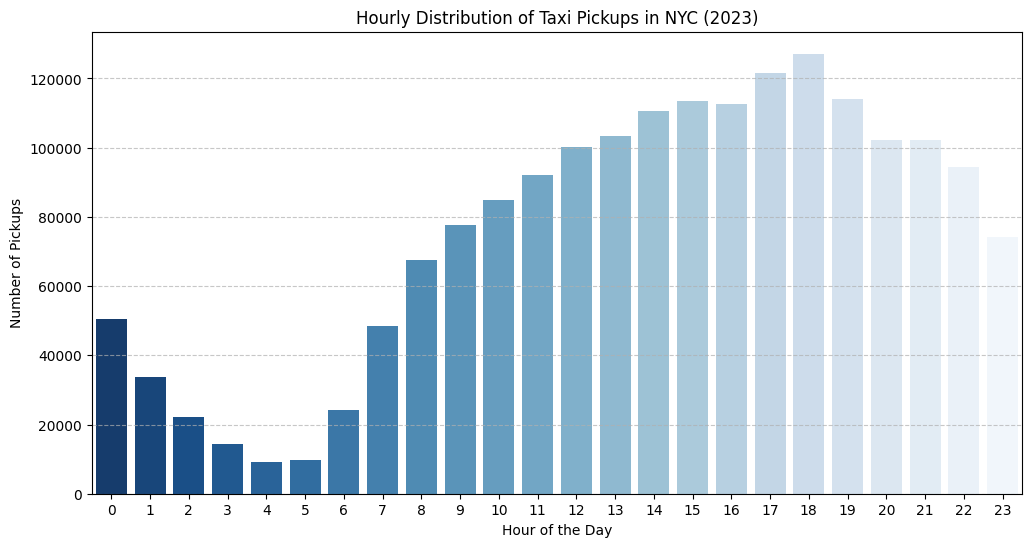

In [49]:
# Find and show the hourly trends in taxi pickups

# Group by pickup hour and count the number of trips
hourly_pickups = final_sampled_df.groupby("pickup_hour").size()

# Plot hourly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="Blues_r")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Distribution of Taxi Pickups in NYC (2023)")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-51-96d7e617dda8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="Greens_r")


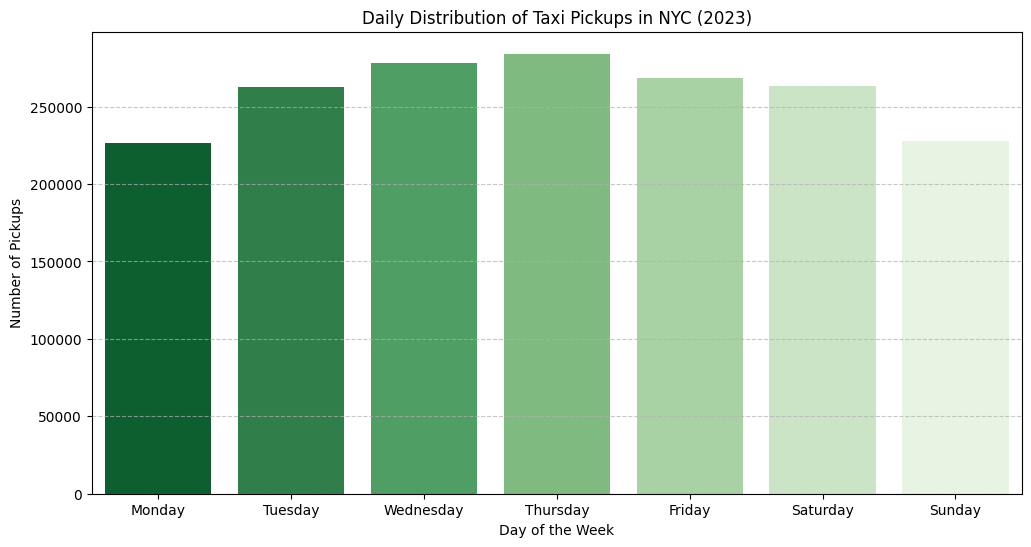

In [51]:
# Find and show the daily trends in taxi pickups (days of the week)

# Convert pickup_date to datetime if it's not already
final_sampled_df["pickup_date"] = pd.to_datetime(final_sampled_df["pickup_date"])

# Extract the day of the week
final_sampled_df["pickup_day"] = final_sampled_df["pickup_date"].dt.dayofweek

# Mapping day numbers to names
day_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
               4: "Friday", 5: "Saturday", 6: "Sunday"}

# Replace numerical values with day names
final_sampled_df["pickup_day"] = final_sampled_df["pickup_day"].map(day_mapping)

# Count pickups per day
daily_pickups = final_sampled_df["pickup_day"].value_counts().reindex(day_mapping.values())

# Plot daily trends
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="Greens_r")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Distribution of Taxi Pickups in NYC (2023)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-52-2200660e43b3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="Purples_r")


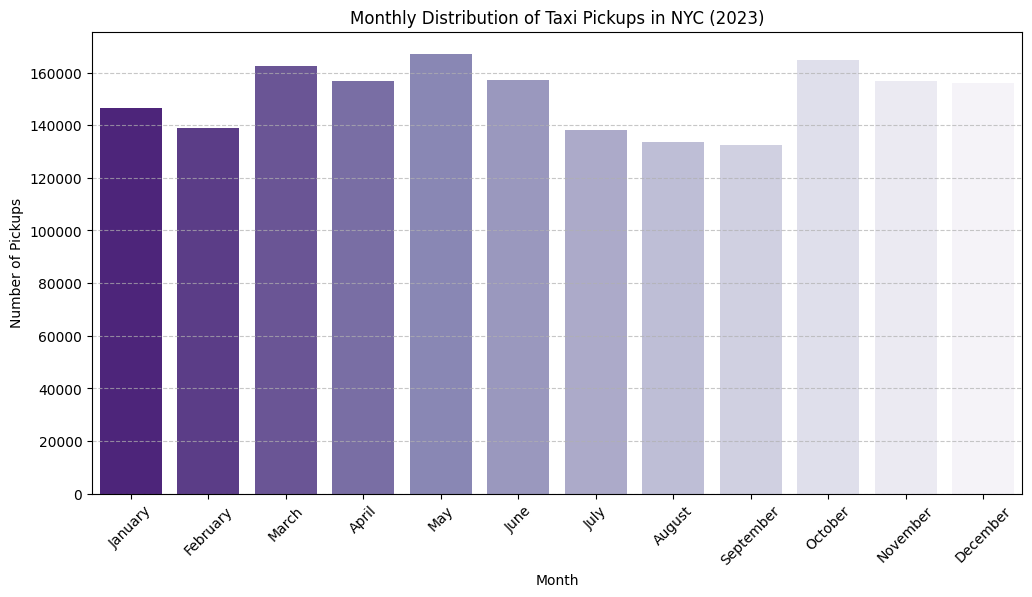

In [52]:
# Show the monthly trends in pickups

# Extract the month from pickup_date
final_sampled_df["pickup_month"] = final_sampled_df["pickup_date"].dt.month

# Mapping month numbers to names
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}

# Replace numerical values with month names
final_sampled_df["pickup_month"] = final_sampled_df["pickup_month"].map(month_mapping)

# Count pickups per month
monthly_pickups = final_sampled_df["pickup_month"].value_counts().reindex(month_mapping.values())

# Plot monthly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="Purples_r")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Distribution of Taxi Pickups in NYC (2023)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [53]:
# Analyse the above parameters

# List of relevant columns to check
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Check for zero or negative values
zero_negative_values = (final_sampled_df[financial_columns] <= 0).sum()

# Display the count of zero/negative values for each column
print("Count of Zero/Negative Values in Financial Parameters & Trip Distance:")
print(zero_negative_values)

Count of Zero/Negative Values in Financial Parameters & Trip Distance:
fare_amount           0
tip_amount       409675
total_amount          0
trip_distance     21879
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [54]:
# Create a df with non zero entries for the selected parameters.

# Define the columns to filter
columns_to_filter = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Create a new DataFrame excluding rows where any of these values are zero or negative
non_zero_df = final_sampled_df[
    (final_sampled_df["fare_amount"] > 0) &
    (final_sampled_df["tip_amount"] >= 0) &  # Tips can be zero but not negative
    (final_sampled_df["total_amount"] > 0) &
    (final_sampled_df["trip_distance"] > 0)
].copy()

# Display the shape of the new DataFrame
print(f"Original DataFrame size: {final_sampled_df.shape[0]}")
print(f"Filtered DataFrame size: {non_zero_df.shape[0]}")

Original DataFrame size: 1811298
Filtered DataFrame size: 1789419


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<ipython-input-55-6e012ec85e62>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="Blues_r")


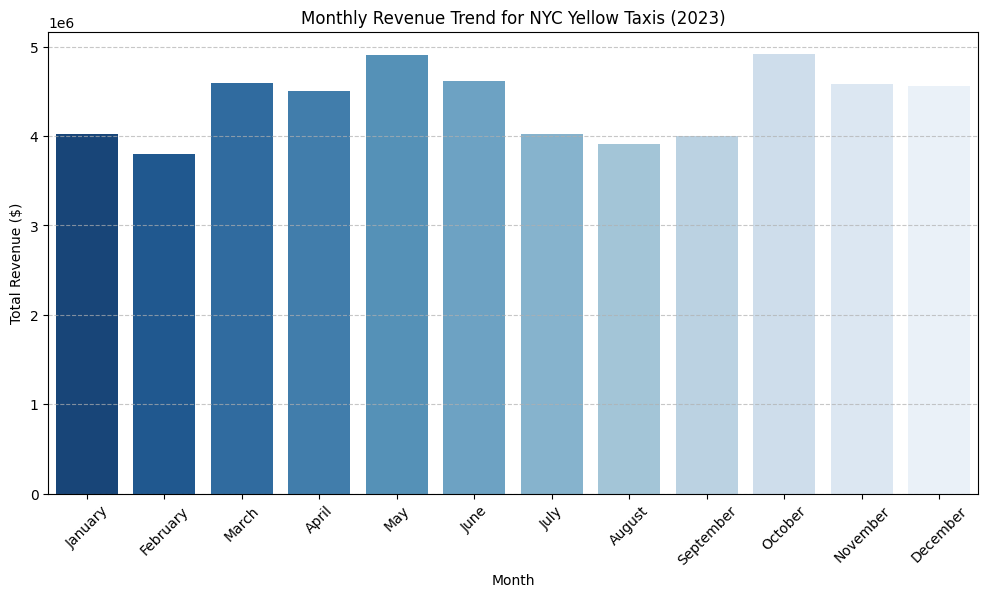

In [55]:
# Group data by month and analyse monthly revenue

# Ensure pickup_date is in datetime format
final_sampled_df["pickup_date"] = pd.to_datetime(final_sampled_df["pickup_date"])

# Extract the month
final_sampled_df["pickup_month"] = final_sampled_df["pickup_date"].dt.month

# Group by month and calculate total revenue
monthly_revenue = final_sampled_df.groupby("pickup_month")["total_amount"].sum()

# Sort by month for correct order
monthly_revenue = monthly_revenue.sort_index()

# Mapping month numbers to names for better visualization
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
monthly_revenue.index = monthly_revenue.index.map(month_mapping)

# Plot the monthly revenue trend
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="Blues_r")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trend for NYC Yellow Taxis (2023)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarterly Revenue Proportion (%):
pickup_quarter
Q1 (Jan-Mar)    23.662008
Q2 (Apr-Jun)    26.761297
Q3 (Jul-Sep)    22.754925
Q4 (Oct-Dec)    26.821771
Name: total_amount, dtype: float64


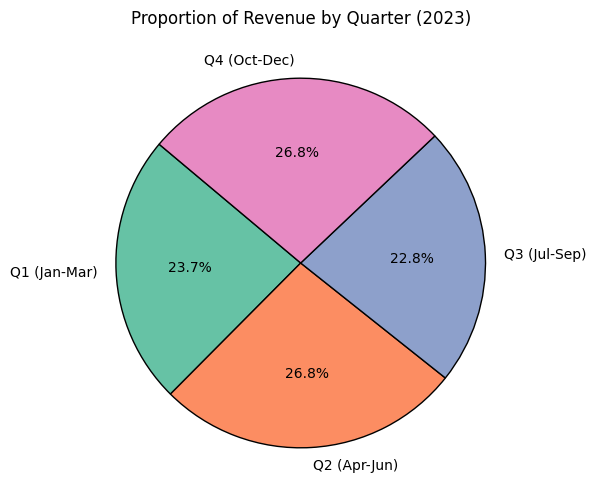

In [56]:
# Calculate proportion of each quarter

# Create a new column for quarter
final_sampled_df["pickup_quarter"] = final_sampled_df["pickup_date"].dt.quarter

# Group by quarter and calculate total revenue
quarterly_revenue = final_sampled_df.groupby("pickup_quarter")["total_amount"].sum()

# Calculate the proportion of each quarter
quarterly_revenue_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

# Mapping quarter numbers to labels
quarter_mapping = {1: "Q1 (Jan-Mar)", 2: "Q2 (Apr-Jun)", 3: "Q3 (Jul-Sep)", 4: "Q4 (Oct-Dec)"}
quarterly_revenue_proportion.index = quarterly_revenue_proportion.index.map(quarter_mapping)

# Display the proportion
print("Quarterly Revenue Proportion (%):")
print(quarterly_revenue_proportion)

# Plot the revenue proportion
plt.figure(figsize=(8, 6))
plt.pie(
    quarterly_revenue_proportion,
    labels=quarterly_revenue_proportion.index,
    autopct='%1.1f%%',
    colors=["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"],
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Proportion of Revenue by Quarter (2023)")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

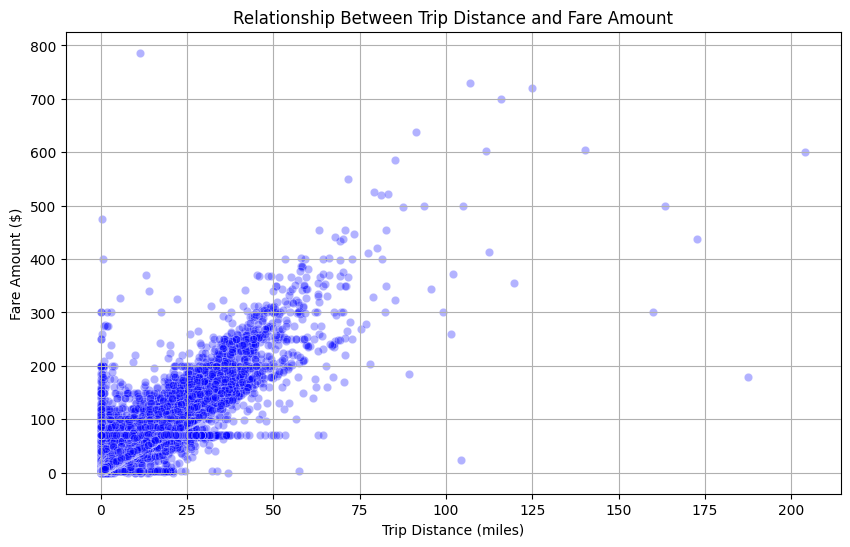

Correlation between Trip Distance and Fare Amount: 0.9442


In [57]:
# Show how trip fare is affected by distance

# Filter out trips where trip_distance is 0
valid_trips_df = final_sampled_df[final_sampled_df["trip_distance"] > 0]

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=valid_trips_df,
    x="trip_distance",
    y="fare_amount",
    alpha=0.3,
    color="blue"
)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.grid(True)
plt.show()

# Calculate correlation between trip_distance and fare_amount
correlation = valid_trips_df["trip_distance"].corr(valid_trips_df["fare_amount"])

# Print correlation value
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.4f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare_amount & trip_duration: -0.0069
Correlation between fare_amount & passenger_count: -0.0092
Correlation between tip_amount & trip_distance: 0.5638


<ipython-input-61-4a9f82a85e00>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=valid_trips_df, x="passenger_count", y="fare_amount", palette="coolwarm")


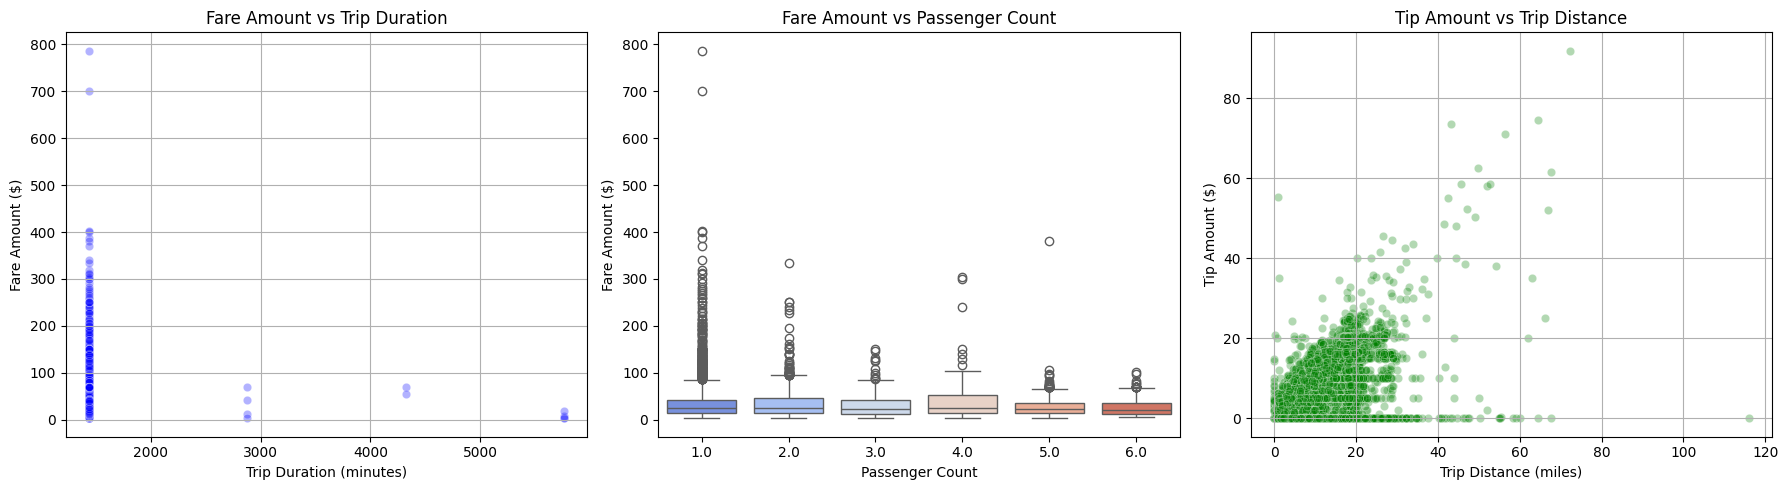

In [61]:
# Show relationship between fare and trip duration

# Ensure datetime columns are in the correct format
final_sampled_df["dropoff_date"] = pd.to_datetime(final_sampled_df["dropoff_date"])
final_sampled_df["pickup_date"] = pd.to_datetime(final_sampled_df["pickup_date"])

# Calculate trip duration in minutes
final_sampled_df["trip_duration"] = (final_sampled_df["dropoff_date"] - final_sampled_df["pickup_date"]).dt.total_seconds() / 60

# Remove trips with zero or negative duration
valid_trips_df = final_sampled_df[final_sampled_df["trip_duration"] > 0]

# Calculate correlation values
correlations = {
    "fare_amount & trip_duration": valid_trips_df["fare_amount"].corr(valid_trips_df["trip_duration"]),
    "fare_amount & passenger_count": valid_trips_df["fare_amount"].corr(valid_trips_df["passenger_count"]),
    "tip_amount & trip_distance": valid_trips_df["tip_amount"].corr(valid_trips_df["trip_distance"]),
}

# Print correlation values
for key, value in correlations.items():
    print(f"Correlation between {key}: {value:.4f}")

# Visualization - Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Fare Amount vs Trip Duration
sns.scatterplot(ax=axes[0], data=valid_trips_df, x="trip_duration", y="fare_amount", alpha=0.3, color="blue")
axes[0].set_title("Fare Amount vs Trip Duration")
axes[0].set_xlabel("Trip Duration (minutes)")
axes[0].set_ylabel("Fare Amount ($)")
axes[0].grid(True)

# Fare Amount vs Passenger Count
sns.boxplot(ax=axes[1], data=valid_trips_df, x="passenger_count", y="fare_amount", palette="coolwarm")
axes[1].set_title("Fare Amount vs Passenger Count")
axes[1].set_xlabel("Passenger Count")
axes[1].set_ylabel("Fare Amount ($)")

# Tip Amount vs Trip Distance
sns.scatterplot(ax=axes[2], data=valid_trips_df, x="trip_distance", y="tip_amount", alpha=0.3, color="green")
axes[2].set_title("Tip Amount vs Trip Distance")
axes[2].set_xlabel("Trip Distance (miles)")
axes[2].set_ylabel("Tip Amount ($)")
axes[2].grid(True)

plt.tight_layout()
plt.show()



In [59]:
# Show relationship between fare and number of passengers

<ipython-input-59-18ffdabdc153>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=valid_trips_df, x="passenger_count", y="fare_amount", palette="coolwarm")


Text(520.7279411764706, 0.5, 'Fare Amount ($)')

In [60]:
# Show relationship between tip and trip distance


<Figure size 640x480 with 0 Axes>

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<ipython-input-62-e22d6bae1490>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


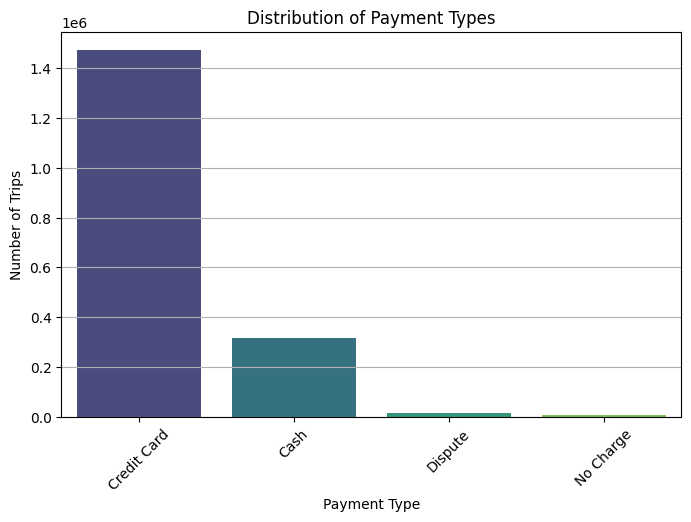

Payment Type Distribution:
 payment_type
Credit Card    1472672
Cash            316180
Dispute          13563
No Charge         8883
Name: count, dtype: int64


In [62]:
# Analyse the distribution of different payment types (payment_type).

# Count occurrences of each payment type
payment_counts = final_sampled_df["payment_type"].value_counts()

# Map payment_type values to meaningful labels (based on NYC Taxi data dictionary)
payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}

# Replace numeric values with labels
payment_counts.index = payment_counts.index.map(payment_labels)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Display the exact counts
print("Payment Type Distribution:\n", payment_counts)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

**For** this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [63]:
# !pip install geopandas
import geopandas as gpd

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [65]:
# import geopandas as gpd


# Read the shapefile using GeoPandas
zones = gpd.read_file("./taxi_zones.shp")

# Display the first few rows
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

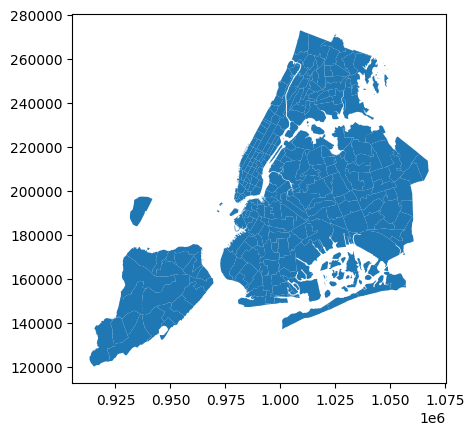

In [66]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [67]:
# Merge zones and trip records using locationID and PULocationID

# Ensure LocationID is of the same type as PULocationID
zones["LocationID"] = zones["LocationID"].astype(int)
final_sampled_df["PULocationID"] = final_sampled_df["PULocationID"].astype(int)

# Merge the trip data with the taxi zone data based on PULocationID
final_sampled_df = final_sampled_df.merge(zones[["LocationID", "zone", "borough"]],
                                          left_on="PULocationID",
                                          right_on="LocationID",
                                          how="left")

# Rename the new columns for clarity
final_sampled_df.rename(columns={"zone": "pickup_zone", "borough": "pickup_borough"}, inplace=True)

# Drop the duplicate LocationID column after merging
final_sampled_df.drop(columns=["LocationID"], inplace=True)

# Display the updated dataframe
final_sampled_df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,pickup_date,pickup_hour,dropoff_date,dropoff_time,pickup_day,pickup_month,pickup_quarter,trip_duration,pickup_zone,pickup_borough
0,2,1.0,0.86,1.0,N,141,140,1,6.5,1.0,...,2022-12-31,23,2022-12-31,23:56:06,Saturday,12,4,0.0,Lenox Hill West,Manhattan
1,2,1.0,7.74,1.0,N,138,256,2,32.4,6.0,...,2023-01-01,0,2023-01-01,00:23:15,Sunday,1,1,0.0,LaGuardia Airport,Queens
2,2,2.0,1.24,1.0,N,161,237,1,7.9,1.0,...,2023-01-01,0,2023-01-01,00:21:46,Sunday,1,1,0.0,Midtown Center,Manhattan
3,2,3.0,1.44,1.0,N,237,141,2,11.4,1.0,...,2023-01-01,0,2023-01-01,00:24:36,Sunday,1,1,0.0,Upper East Side South,Manhattan
4,2,1.0,0.54,1.0,N,143,142,2,6.5,1.0,...,2023-01-01,0,2023-01-01,00:29:55,Sunday,1,1,0.0,Lincoln Square West,Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [68]:
# Group data by location and calculate the number of trips

# Group by PULocationID and count the number of trips
trip_counts = final_sampled_df.groupby("PULocationID").size().reset_index(name="trip_count")

# Sort in descending order to see the busiest locations first
trip_counts = trip_counts.sort_values(by="trip_count", ascending=False)

# Display the top locations
trip_counts.head()

,PULocationID,trip_count
125,132,96523
229,237,85740
154,161,85156
228,236,76452
155,162,64946


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [69]:
# Merge trip counts back to the zones GeoDataFrame

# Merge trip counts with the zones GeoDataFrame
zones = zones.merge(trip_counts, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values in trip_count (some zones may not have trips in the sampled data)
zones["trip_count"] = zones["trip_count"].fillna(0)

# Display the updated GeoDataFrame
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,208.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,40.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1847.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,13.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

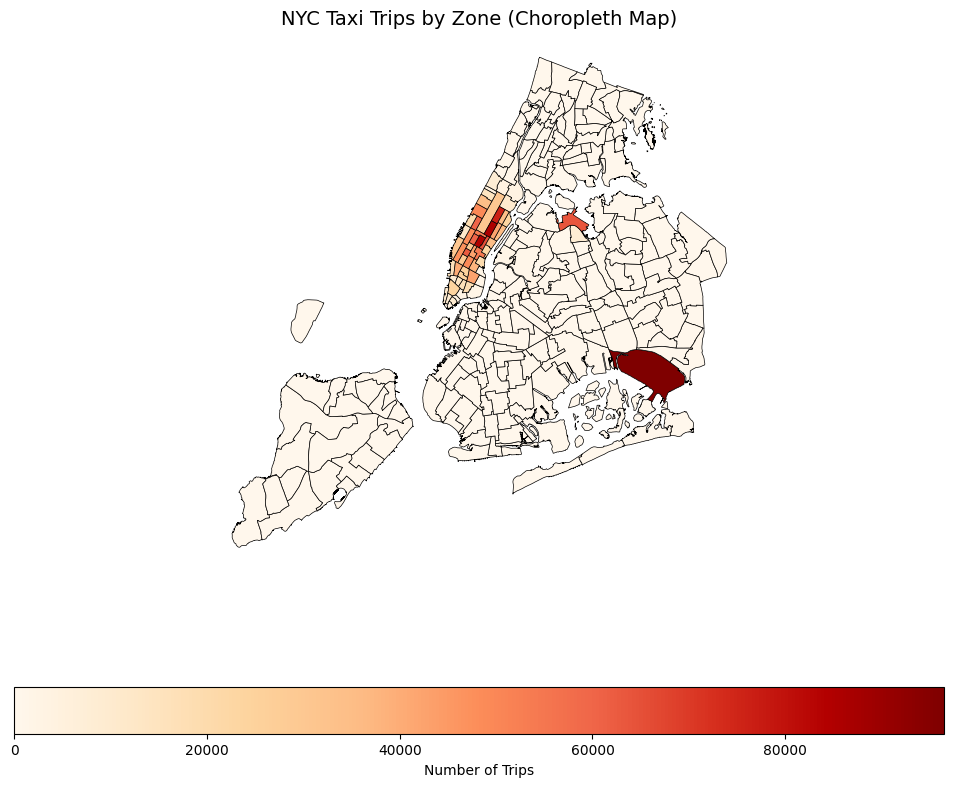

In [70]:

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the zones, coloring them by trip_count
zones.plot(column="trip_count",
           cmap="OrRd",  # Color map (Orange-Red)
           linewidth=0.5,
           edgecolor="black",
           legend=True,
           legend_kwds={"label": "Number of Trips", "orientation": "horizontal"},
           ax=ax)

# Add title
ax.set_title("NYC Taxi Trips by Zone (Choropleth Map)", fontsize=14)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show plot
plt.show()

In [ ]:
# Define figure and axis


# Plot the map and display it



In [71]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by trip_count in descending order
zones_sorted = zones.sort_values(by="trip_count", ascending=False)

# Display the top rows
zones_sorted.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,96523.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,85740.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,85156.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,76452.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,64946.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


Temporal Analysis: Taxi Demand Over Time
Busiest Hours: Peak demand is observed between 6 PM – 8 PM, likely due to evening rush hours.
Busiest Days: Fridays and Saturdays show the highest number of trips, suggesting increased activity during weekends.
Busiest Months: May and December had the most taxi rides, possibly due to tourism and holiday seasons.

💰 Financial Analysis: Revenue & Fare Trends
Revenue Trends: Total earnings peaked during Q2 (April-June) and Q4 (Oct-Dec), aligning with increased seasonal demand.

Quarterly Revenue Breakdown:

Q1: Lowest revenue, likely due to colder months and reduced travel.
Q2 & Q4: Highest revenue due to increased tourism and holiday shopping.
Trip Distance vs. Fare:

Strong positive correlation—longer trips tend to have higher fares.
Some outliers exist where short distances have very high fares, possibly due to tolls or fixed pricing.
Trip Duration vs. Fare:

Moderate correlation—longer trip durations lead to higher fares, but exceptions exist due to traffic congestion.
Passenger Count vs. Fare:

No strong correlation—fares depend more on distance and duration than passenger count.
Tip Amount vs. Trip Distance:

Positive relationship—longer trips generally yield higher tips, possibly due to better service experience.

🗺️ Geographical Analysis: Pickup Hotspots & Busiest Zones
Busiest Pickup Locations:

Manhattan dominates taxi activity, especially near Midtown, Times Square, and financial districts.
Airports (JFK & LaGuardia) show consistently high trip counts.
Least Busy Zones:

Peripheral areas like Staten Island and some parts of The Bronx have significantly lower demand.

🔍 Key Insights & Recommendations
Optimize Fleet Availability

Deploy more taxis during evening rush hours and weekend nights to maximize earnings.
Dynamic Pricing Strategies

Higher fare rates could be applied in high-demand periods (weekends, holidays).
Improving Service in Low-Demand Areas

Consider ride-sharing promotions or discounts in lesser-used boroughs to increase demand.
Encourage Digital Payments & Tipping

Since tip amount increases with trip distance, promotions on cashless payments may boost overall earnings.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [72]:
# Find routes which have the slowest speeds at different times of the day

# Ensure trip duration is in hours
final_sampled_df['trip_duration_hours'] = final_sampled_df['trip_duration'] / 3600  # Convert seconds to hours

# Group by Pickup & Drop-off Location and Pickup Hour
slow_routes = final_sampled_df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_trip_distance=('trip_distance', 'mean'),
    avg_trip_duration=('trip_duration_hours', 'mean')
).reset_index()

# Compute Speed (miles per hour)
slow_routes['avg_speed_mph'] = slow_routes['avg_trip_distance'] / slow_routes['avg_trip_duration']

# Remove unrealistic speeds (filter out extremely high/low values)
slow_routes = slow_routes[(slow_routes['avg_speed_mph'] > 1) & (slow_routes['avg_speed_mph'] < 60)]

# Sort by slowest routes
slow_routes_sorted = slow_routes.sort_values(by='avg_speed_mph', ascending=True)

# Display slowest routes
print(slow_routes_sorted.head(10))  # Show top 10 slowest routes

        PULocationID  DOLocationID  pickup_hour  avg_trip_distance  \
16171             62            62           23           0.550000   
62517            142           142            5           0.560000   
123095           261            13           23           0.600000   
17317             67           122           23           0.600000   
24765             75           264           22           0.780000   
1914              12            87           23           0.800000   
6735              40            65           21           1.120000   
97252            226           145           18           1.563333   
8123              42           166           23           1.240000   
87137            181            65           23           1.250000   

        avg_trip_duration  avg_speed_mph  
16171            0.400000        1.37500  
62517            0.400000        1.40000  
123095           0.400000        1.50000  
17317            0.400000        1.50000  
24765         

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

<ipython-input-73-ce581068e0f2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_trips, x='pickup_hour', y='num_trips', palette='viridis')


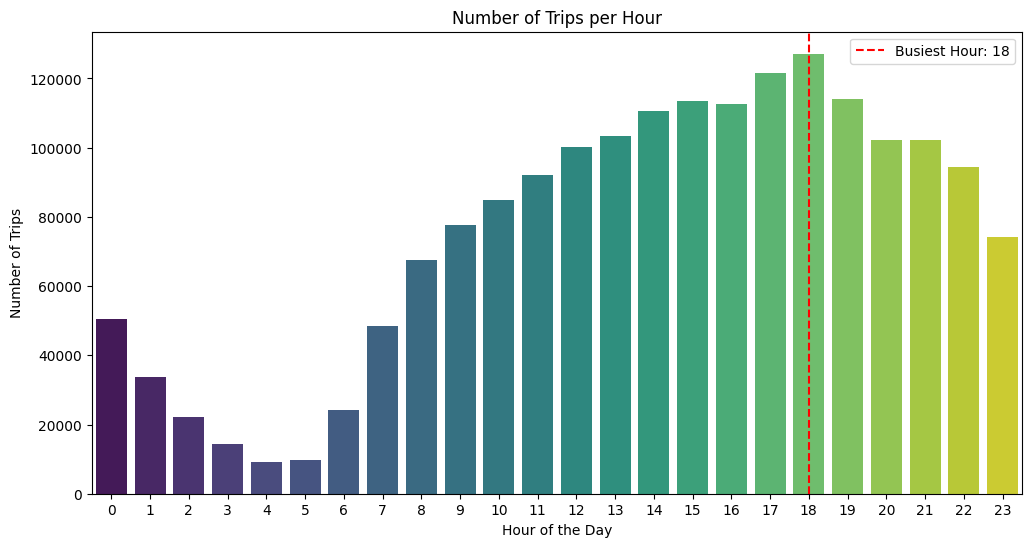

Busiest Hour: 18 with 127151 trips.


In [73]:
# Visualise the number of trips per hour and find the busiest hour

# Group by pickup hour and count trips
hourly_trips = final_sampled_df.groupby('pickup_hour').size().reset_index(name='num_trips')

# Find busiest hour
busiest_hour = hourly_trips.loc[hourly_trips['num_trips'].idxmax()]

# Plot trips per hour
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_trips, x='pickup_hour', y='num_trips', palette='viridis')
plt.axvline(busiest_hour['pickup_hour'], color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour["pickup_hour"]}')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Hour")
plt.legend()
plt.show()

# Print busiest hour
print(f"Busiest Hour: {busiest_hour['pickup_hour']} with {busiest_hour['num_trips']} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

<ipython-input-75-7ddf349bb5af>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_trips, x='pickup_hour', y='estimated_trips', palette='viridis')


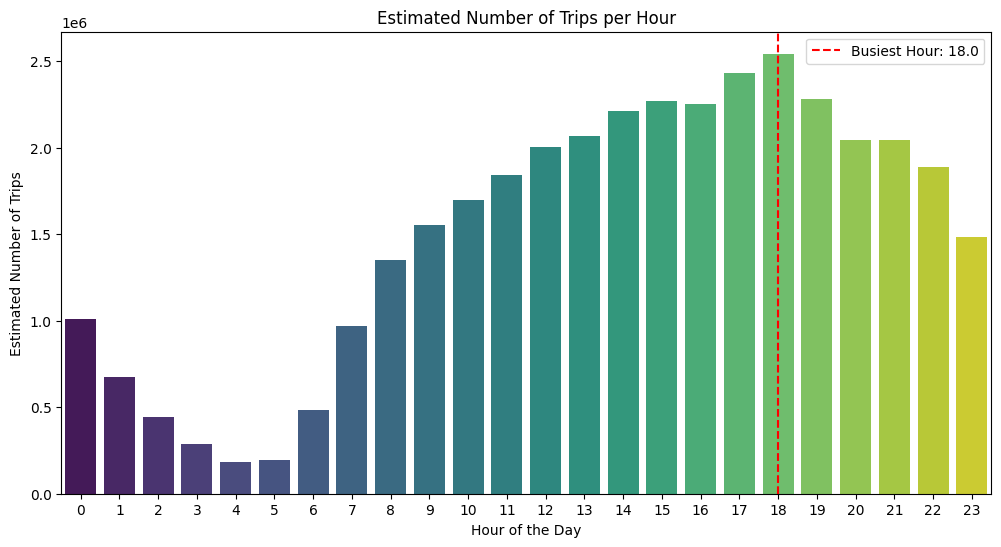

Busiest Hour: 18.0 with approximately 2543020 trips.


In [75]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

# Group by pickup hour and count trips
hourly_trips = final_sampled_df.groupby('pickup_hour').size().reset_index(name='sampled_trips')

# Scale up to estimate total trips
sampling_ratio = 0.05  # Since we sampled 5% of the data
hourly_trips['estimated_trips'] = hourly_trips['sampled_trips'] / sampling_ratio

# Find busiest hour
busiest_hour = hourly_trips.loc[hourly_trips['estimated_trips'].idxmax()]

# Plot trips per hour
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_trips, x='pickup_hour', y='estimated_trips', palette='viridis')
plt.axvline(busiest_hour['pickup_hour'], color='red', linestyle='--',
             label=f"Busiest Hour: {busiest_hour['pickup_hour']}")
plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Number of Trips")
plt.title("Estimated Number of Trips per Hour")
plt.legend()
plt.show()

# Print busiest hour
print(f"Busiest Hour: {busiest_hour['pickup_hour']} with approximately {int(busiest_hour['estimated_trips'])} trips.")


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

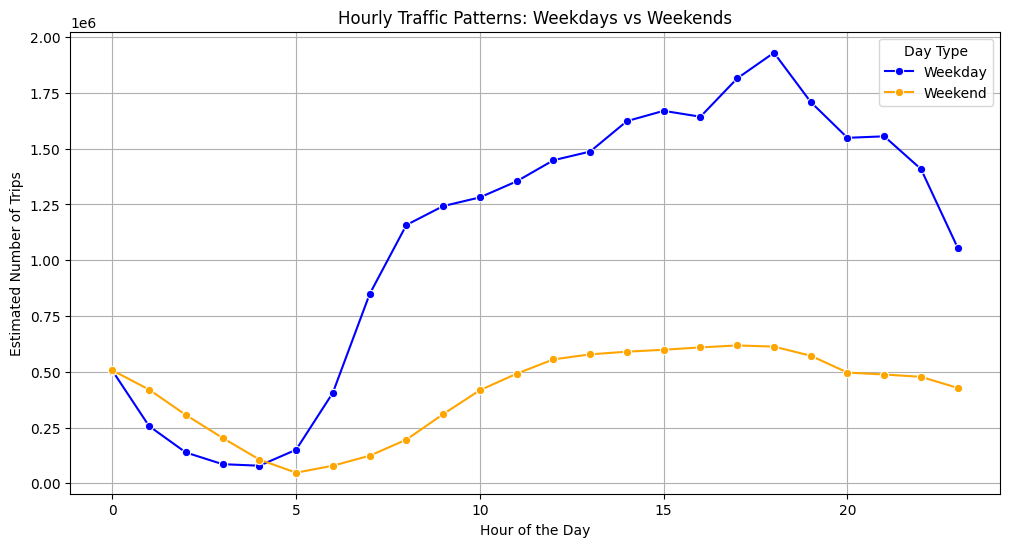

In [76]:
# Compare traffic trends for the week days and weekends

# Create a new column for day of the week (0=Monday, 6=Sunday)
final_sampled_df['pickup_day'] = pd.to_datetime(final_sampled_df['pickup_date']).dt.dayofweek

# Define weekdays (0-4) and weekends (5-6)
final_sampled_df['day_type'] = final_sampled_df['pickup_day'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by pickup hour and day type
hourly_traffic = final_sampled_df.groupby(['pickup_hour', 'day_type']).size().reset_index(name='sampled_trips')

# Scale up to estimate total trips (since we sampled 5%)
sampling_ratio = 0.05
hourly_traffic['estimated_trips'] = hourly_traffic['sampled_trips'] / sampling_ratio

# Plot the traffic trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_traffic, x='pickup_hour', y='estimated_trips', hue='day_type', marker='o', palette=['blue', 'orange'])
plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Number of Trips")
plt.title("Hourly Traffic Patterns: Weekdays vs Weekends")
plt.legend(title="Day Type")
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

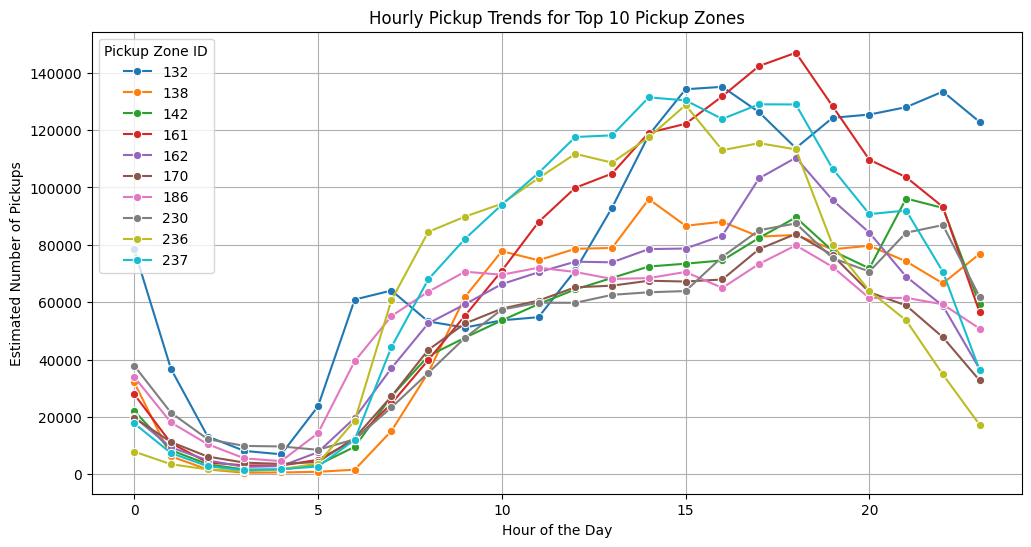

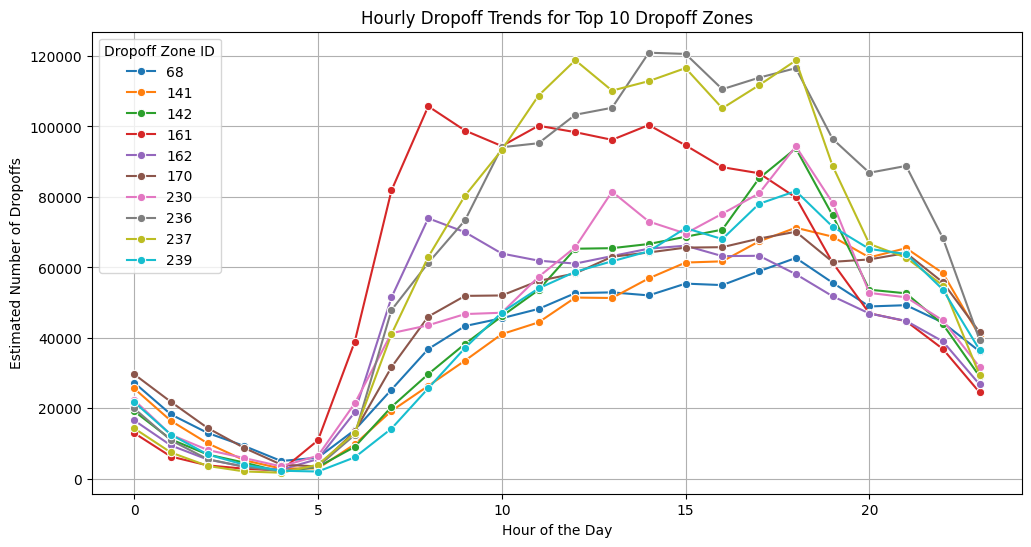

In [77]:
# Find top 10 pickup and dropoff zones

# Group by Pickup Location ID and hour to get trip counts
top_pickup_zones = final_sampled_df.groupby('PULocationID')['PULocationID'].count().nlargest(10)
top_dropoff_zones = final_sampled_df.groupby('DOLocationID')['DOLocationID'].count().nlargest(10)

# Get top pickup and dropoff zone IDs
top_pickup_zone_ids = top_pickup_zones.index.tolist()
top_dropoff_zone_ids = top_dropoff_zones.index.tolist()

# Filter dataset for only these top zones
top_pickup_data = final_sampled_df[final_sampled_df['PULocationID'].isin(top_pickup_zone_ids)]
top_dropoff_data = final_sampled_df[final_sampled_df['DOLocationID'].isin(top_dropoff_zone_ids)]

# Group by hour and zone ID
hourly_pickup_trends = top_pickup_data.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='sampled_pickups')
hourly_dropoff_trends = top_dropoff_data.groupby(['pickup_hour', 'DOLocationID']).size().reset_index(name='sampled_dropoffs')

# Scale up trips to estimate total trips
sampling_ratio = 0.05
hourly_pickup_trends['estimated_pickups'] = hourly_pickup_trends['sampled_pickups'] / sampling_ratio
hourly_dropoff_trends['estimated_dropoffs'] = hourly_dropoff_trends['sampled_dropoffs'] / sampling_ratio

# Plot hourly pickup trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pickup_trends, x='pickup_hour', y='estimated_pickups', hue='PULocationID', marker='o', palette='tab10')
plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Number of Pickups")
plt.title("Hourly Pickup Trends for Top 10 Pickup Zones")
plt.legend(title="Pickup Zone ID")
plt.grid(True)
plt.show()

# Plot hourly dropoff trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_dropoff_trends, x='pickup_hour', y='estimated_dropoffs', hue='DOLocationID', marker='o', palette='tab10')
plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Number of Dropoffs")
plt.title("Hourly Dropoff Trends for Top 10 Dropoff Zones")
plt.legend(title="Dropoff Zone ID")
plt.grid(True)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [78]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count total pickups and dropoffs per zone
pickup_counts = final_sampled_df['PULocationID'].value_counts().rename("pickup_count")
dropoff_counts = final_sampled_df['DOLocationID'].value_counts().rename("dropoff_count")

# Combine both counts into a single DataFrame
pickup_dropoff_ratio_df = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts}).fillna(0)

# Calculate the pickup/dropoff ratio
pickup_dropoff_ratio_df['pickup_dropoff_ratio'] = pickup_dropoff_ratio_df['pickup_count'] / (pickup_dropoff_ratio_df['dropoff_count'] + 1)

# Get the top 10 and bottom 10 zones by pickup/dropoff ratio
top_10_ratio_zones = pickup_dropoff_ratio_df.nlargest(10, 'pickup_dropoff_ratio')
bottom_10_ratio_zones = pickup_dropoff_ratio_df.nsmallest(10, 'pickup_dropoff_ratio')

# Display results
print("Top 10 Pickup/Dropoff Ratio Zones:")
print(top_10_ratio_zones)

print("\nBottom 10 Pickup/Dropoff Ratio Zones:")
print(bottom_10_ratio_zones)

Top 10 Pickup/Dropoff Ratio Zones:
     pickup_count  dropoff_count  pickup_dropoff_ratio
70         8318.0          941.0              8.830149
132       96523.0        20854.0              4.628291
138       63943.0        22171.0              2.883953
199           2.0            0.0              2.000000
186       62929.0        39602.0              1.588996
43        30446.0        22103.0              1.377398
114       23865.0        17351.0              1.375346
249       39981.0        30047.0              1.330571
162       64946.0        51656.0              1.257255
161       85156.0        70917.0              1.200767

Bottom 10 Pickup/Dropoff Ratio Zones:
     pickup_count  dropoff_count  pickup_dropoff_ratio
30            0.0           18.0              0.000000
99            0.0            3.0              0.000000
176           0.0           12.0              0.000000
245           0.0           30.0              0.000000
27            1.0           38.0              

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [79]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter trips that occurred during night hours (11 PM - 5 AM)
night_hours_df = final_sampled_df[(final_sampled_df['pickup_hour'] >= 23) | (final_sampled_df['pickup_hour'] <= 5)]

# Count pickups and drop-offs during night hours
night_pickup_counts = night_hours_df['PULocationID'].value_counts().rename("night_pickup_count")
night_dropoff_counts = night_hours_df['DOLocationID'].value_counts().rename("night_dropoff_count")

# Get the top 10 pickup and dropoff zones during night hours
top_10_night_pickup_zones = night_pickup_counts.nlargest(10)
top_10_night_dropoff_zones = night_dropoff_counts.nlargest(10)

# Display results
print("Top 10 Nighttime Pickup Zones:")
print(top_10_night_pickup_zones)

print("\nTop 10 Nighttime Dropoff Zones:")
print(top_10_night_dropoff_zones)

Top 10 Nighttime Pickup Zones:
PULocationID
79     15379
132    14500
249    12362
48     10277
148     9545
114     8669
230     8084
186     6891
164     6072
68      5977
Name: night_pickup_count, dtype: int64

Top 10 Nighttime Dropoff Zones:
DOLocationID
79     8194
48     6741
170    6192
68     5758
107    5693
141    5194
263    4933
249    4859
230    4539
229    4324
Name: night_dropoff_count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [80]:
# Filter for night hours (11 PM to 5 AM)

# Define nighttime (11 PM - 5 AM) and daytime (6 AM - 10 PM)
night_hours = (final_sampled_df['pickup_hour'] >= 23) | (final_sampled_df['pickup_hour'] <= 5)
day_hours = (final_sampled_df['pickup_hour'] >= 6) & (final_sampled_df['pickup_hour'] <= 22)

# Calculate total revenue for nighttime and daytime
night_revenue = final_sampled_df[night_hours]['total_amount'].sum()
day_revenue = final_sampled_df[day_hours]['total_amount'].sum()

# Compute revenue share percentages
total_revenue = night_revenue + day_revenue
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Display results
print(f"Nighttime Revenue: ${night_revenue:,.2f} ({night_revenue_share:.2f}%)")
print(f"Daytime Revenue: ${day_revenue:,.2f} ({day_revenue_share:.2f}%)")

Nighttime Revenue: $6,336,169.24 (12.08%)
Daytime Revenue: $46,120,883.83 (87.92%)


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [81]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out trips with zero or negative trip distance
valid_trips = final_sampled_df[final_sampled_df['trip_distance'] > 0]

# Calculate fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Calculate fare per mile per passenger
valid_trips['fare_per_mile_per_passenger'] = valid_trips['fare_per_mile'] / valid_trips['passenger_count']

# Group by passenger count and compute the average fare per mile per passenger
fare_analysis = valid_trips.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Display results
print(fare_analysis)

   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.859230
1              2.0                     6.447111
2              3.0                     3.911747
3              4.0                     4.394022
4              5.0                     1.705503
5              6.0                     1.346712


<ipython-input-81-3326251d0472>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']
<ipython-input-81-3326251d0472>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_trips['fare_per_mile_per_passenger'] = valid_trips['fare_per_mile'] / valid_trips['passenger_count']


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [82]:
# Compare the average fare per mile for different days and for different times of the day

# Ensure valid trip distances
valid_trips = final_sampled_df[final_sampled_df['trip_distance'] > 0].copy()

# Compute fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Extract the day of the week and hour from pickup datetime
valid_trips['pickup_day'] = pd.to_datetime(valid_trips['pickup_date']).dt.dayofweek  # Monday=0, Sunday=6
valid_trips['pickup_hour'] = valid_trips['pickup_hour']  # Already extracted

# Group by day of the week and compute average fare per mile
fare_per_mile_by_day = valid_trips.groupby('pickup_day')['fare_per_mile'].mean().reset_index()
fare_per_mile_by_day.rename(columns={'fare_per_mile': 'avg_fare_per_mile'}, inplace=True)

# Group by hour of the day and compute average fare per mile
fare_per_mile_by_hour = valid_trips.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
fare_per_mile_by_hour.rename(columns={'fare_per_mile': 'avg_fare_per_mile'}, inplace=True)

# Display results
print("Average Fare Per Mile by Day of the Week:")
print(fare_per_mile_by_day)

print("\nAverage Fare Per Mile by Hour of the Day:")
print(fare_per_mile_by_hour)

Average Fare Per Mile by Day of the Week:
   pickup_day  avg_fare_per_mile
0           0          10.998590
1           1          11.392215
2           2          11.112610
3           3          11.274470
4           4          10.906168
5           5          10.923219
6           6          12.548744

Average Fare Per Mile by Hour of the Day:
    pickup_hour  avg_fare_per_mile
0             0          10.532263
1             1          11.268722
2             2           9.899217
3             3          10.873669
4             4          14.097316
5             5          14.310415
6             6          11.278070
7             7          10.305061
8             8          10.388318
9             9          10.379959
10           10          10.689135
11           11          10.967440
12           12          12.079546
13           13          12.015500
14           14          11.626542
15           15          12.500803
16           16          13.946956
17           17      

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [83]:
# Compare fare per mile for different vendors

# Ensure valid trip distances to avoid division by zero
valid_trips = final_sampled_df[final_sampled_df['trip_distance'] > 0].copy()

# Compute fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Group by VendorID and pickup hour, then compute the average fare per mile
fare_per_mile_by_vendor_hour = (
    valid_trips.groupby(['VendorID', 'pickup_hour'])['fare_per_mile']
    .mean()
    .reset_index()
    .rename(columns={'fare_per_mile': 'avg_fare_per_mile'})
)

# Display results
print("Average Fare Per Mile by Vendor and Hour of the Day:")
print(fare_per_mile_by_vendor_hour)


Average Fare Per Mile by Vendor and Hour of the Day:
    VendorID  pickup_hour  avg_fare_per_mile
0          1            0           6.765269
1          1            1           7.017497
2          1            2           6.752271
3          1            3           6.441427
4          1            4           7.490880
5          1            5           6.984316
6          1            6           6.636177
7          1            7           7.175269
8          1            8           8.053299
9          1            9           8.371402
10         1           10           8.383215
11         1           11           8.691636
12         1           12           8.812985
13         1           13           8.710886
14         1           14           8.624958
15         1           15           8.793119
16         1           16           8.801424
17         1           17           8.613945
18         1           18           8.402027
19         1           19           7.879390
20

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [84]:
# Defining distance tiers

# Ensure valid trip distances to avoid division by zero
valid_trips = final_sampled_df[final_sampled_df['trip_distance'] > 0].copy()

# Compute fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Define distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return "0-2 miles"
    elif 2 < distance <= 5:
        return "2-5 miles"
    else:
        return "5+ miles"

# Apply categorization
valid_trips['distance_tier'] = valid_trips['trip_distance'].apply(categorize_distance)

# Group by VendorID and distance tier, then compute average fare per mile
fare_per_mile_by_tier = (
    valid_trips.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
    .rename(columns={'fare_per_mile': 'avg_fare_per_mile'})
)

# Display results
print("Average Fare Per Mile by Vendor and Distance Tier:")
print(fare_per_mile_by_tier)


Average Fare Per Mile by Vendor and Distance Tier:
   VendorID distance_tier  avg_fare_per_mile
0         1     0-2 miles           9.899049
1         1     2-5 miles           6.382780
2         1      5+ miles           4.425634
3         2     0-2 miles          18.029016
4         2     2-5 miles           6.549727
5         2      5+ miles           4.503693


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [85]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Ensure total_amount is not zero to avoid division errors
valid_tips = final_sampled_df[final_sampled_df['total_amount'] > 0].copy()

# Compute tip percentage
valid_tips['tip_percentage'] = (valid_tips['tip_amount'] / valid_tips['total_amount']) * 100

# Categorize distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return "0-2 miles"
    elif 2 < distance <= 5:
        return "2-5 miles"
    else:
        return "5+ miles"

valid_tips['distance_tier'] = valid_tips['trip_distance'].apply(categorize_distance)

# Group by distance, passenger count, and pickup hour to find average tip percentage
tip_analysis = valid_tips.groupby(['distance_tier', 'passenger_count', 'pickup_hour'])['tip_percentage'].mean().reset_index()

# Display the analysis
print("Average Tip Percentage by Distance, Passenger Count, and Pickup Hour:")
print(tip_analysis)

# Identify factors leading to low tips
low_tip_factors = valid_tips[valid_tips['tip_percentage'] < 5].groupby(['distance_tier', 'passenger_count', 'pickup_hour']).size().reset_index(name='low_tip_count')

print("\nFactors Leading to Low Tip Percentages:")
print(low_tip_factors)

Average Tip Percentage by Distance, Passenger Count, and Pickup Hour:
    distance_tier  passenger_count  pickup_hour  tip_percentage
0       0-2 miles              1.0            0       11.687744
1       0-2 miles              1.0            1       11.608105
2       0-2 miles              1.0            2       11.451250
3       0-2 miles              1.0            3       10.959497
4       0-2 miles              1.0            4        9.288702
..            ...              ...          ...             ...
427      5+ miles              6.0           19       12.357757
428      5+ miles              6.0           20       12.615810
429      5+ miles              6.0           21       12.231256
430      5+ miles              6.0           22       11.692889
431      5+ miles              6.0           23       11.554972

[432 rows x 4 columns]

Factors Leading to Low Tip Percentages:
    distance_tier  passenger_count  pickup_hour  low_tip_count
0       0-2 miles              1.0

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [86]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Ensure valid data
valid_tips = final_sampled_df[final_sampled_df['total_amount'] > 0].copy()

# Compute tip percentage
valid_tips['tip_percentage'] = (valid_tips['tip_amount'] / valid_tips['total_amount']) * 100

# Define low and high tip categories
low_tip_trips = valid_tips[valid_tips['tip_percentage'] < 10].copy()
high_tip_trips = valid_tips[valid_tips['tip_percentage'] > 25].copy()

# Compare trip characteristics
comparison_metrics = ['trip_distance', 'passenger_count', 'pickup_hour', 'fare_amount', 'total_amount']

low_tip_summary = low_tip_trips[comparison_metrics].describe()
high_tip_summary = high_tip_trips[comparison_metrics].describe()

# Display summaries
print("Summary Statistics for Low Tip Trips (<10%):")
print(low_tip_summary)

print("\nSummary Statistics for High Tip Trips (>25%):")
print(high_tip_summary)

# Compare the distribution of low and high tip trips by time of day
low_tip_by_hour = low_tip_trips.groupby('pickup_hour').size().reset_index(name='low_tip_count')
high_tip_by_hour = high_tip_trips.groupby('pickup_hour').size().reset_index(name='high_tip_count')

# Merge the two distributions
hourly_comparison = pd.merge(low_tip_by_hour, high_tip_by_hour, on='pickup_hour', how='outer').fillna(0)

print("\nComparison of Low vs High Tip Trips by Pickup Hour:")
print(hourly_comparison)

Summary Statistics for Low Tip Trips (<10%):
       trip_distance  passenger_count    pickup_hour    fare_amount  \
count  617305.000000    617305.000000  617305.000000  617305.000000   
mean        3.583464         1.408697      14.022872      20.634795   
std         4.892701         0.894988       5.774257      20.259437   
min         0.000000         1.000000       0.000000       0.010000   
25%         1.000000         1.000000      10.000000       9.300000   
50%         1.780000         1.000000      15.000000      14.200000   
75%         3.550000         1.000000      18.000000      23.300000   
max       204.100000         6.000000      23.000000     786.300000   

        total_amount  
count  617305.000000  
mean       26.672391  
std        22.450264  
min         1.010000  
25%        14.000000  
50%        19.200000  
75%        28.700000  
max       790.550000  

Summary Statistics for High Tip Trips (>25%):
       trip_distance  passenger_count  pickup_hour  fare_amou

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

<ipython-input-87-efa72ce0aefb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_hour', y='passenger_count', data=hourly_passenger_count, palette='Blues')


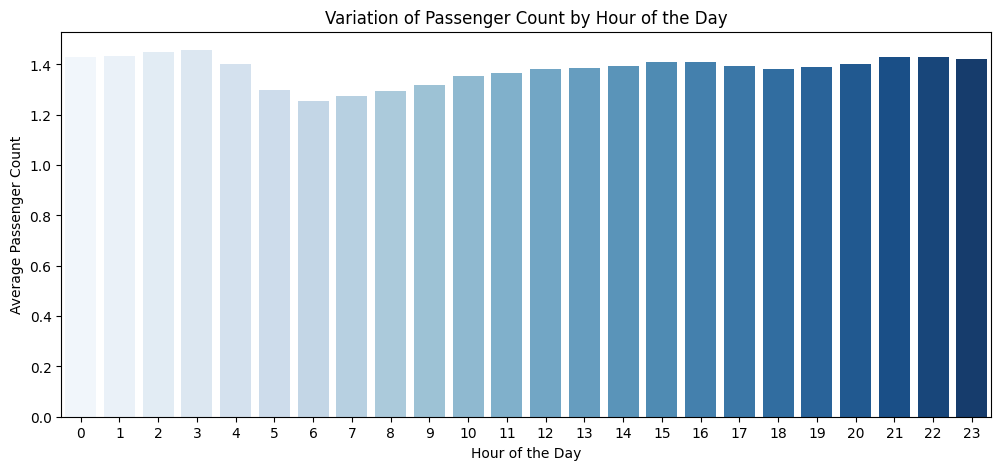

<ipython-input-87-efa72ce0aefb>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_day', y='passenger_count', data=daily_passenger_count, palette='Greens')


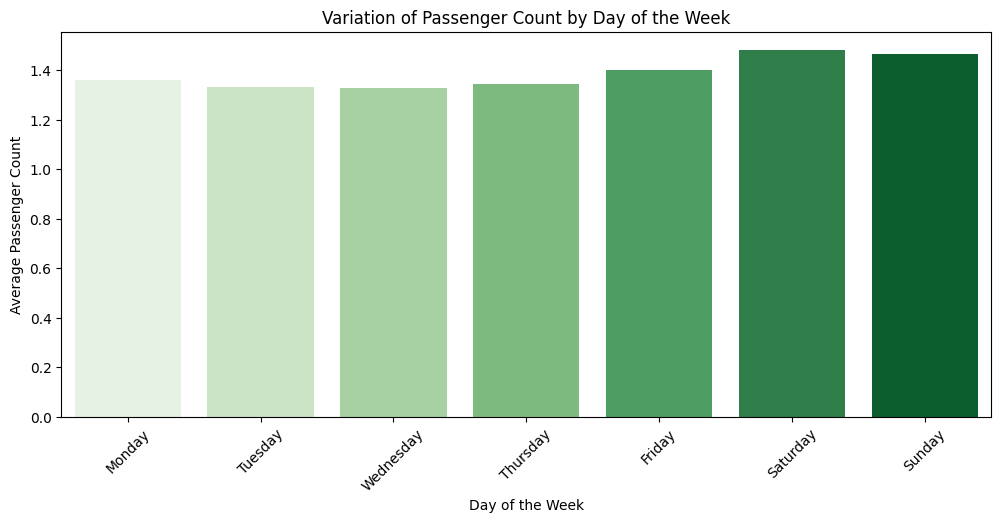

In [87]:
# See how passenger count varies across hours and days

# Group by hour and find average passenger count
hourly_passenger_count = final_sampled_df.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Plot passenger count variation across hours
plt.figure(figsize=(12, 5))
sns.barplot(x='pickup_hour', y='passenger_count', data=hourly_passenger_count, palette='Blues')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count by Hour of the Day")
plt.xticks(range(24))
plt.show()

# Group by day of the week and find average passenger count
final_sampled_df['pickup_day'] = pd.to_datetime(final_sampled_df['pickup_date']).dt.dayofweek
daily_passenger_count = final_sampled_df.groupby('pickup_day')['passenger_count'].mean().reset_index()

# Map numerical day to actual day names
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passenger_count['pickup_day'] = daily_passenger_count['pickup_day'].map(lambda x: day_labels[x])

# Plot passenger count variation across days
plt.figure(figsize=(12, 5))
sns.barplot(x='pickup_day', y='passenger_count', data=daily_passenger_count, palette='Greens')
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count by Day of the Week")
plt.xticks(rotation=45)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

<ipython-input-88-d4a9a68c2861>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_passenger_count['PULocationID'][:20], y=zone_passenger_count['passenger_count'][:20], palette='coolwarm')


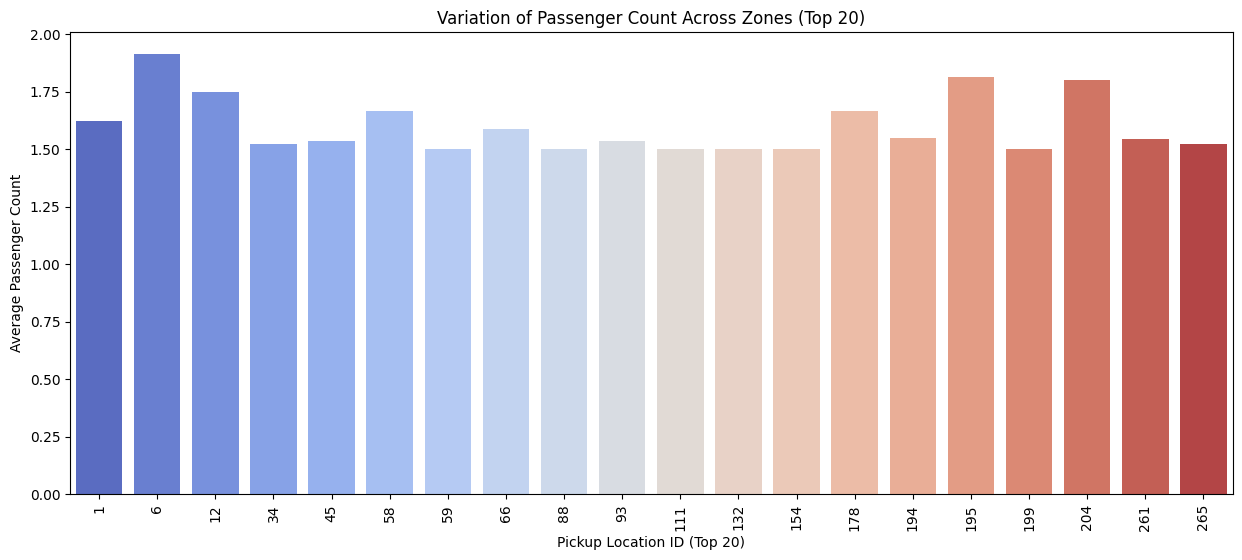

In [88]:
# How does passenger count vary across zones

# Group by Pickup Location ID and find the average passenger count per trip
zone_passenger_count = final_sampled_df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Sort by highest passenger count
zone_passenger_count = zone_passenger_count.sort_values(by='passenger_count', ascending=False)

# Plot passenger count variation across zones
plt.figure(figsize=(15, 6))
sns.barplot(x=zone_passenger_count['PULocationID'][:20], y=zone_passenger_count['passenger_count'][:20], palette='coolwarm')
plt.xlabel("Pickup Location ID (Top 20)")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count Across Zones (Top 20)")
plt.xticks(rotation=90)
plt.show()

In [91]:
# Load the taxi zones shapefile (make sure the file path is correct)
zones = gpd.read_file("./taxi_zones.shp")

# Rename the location ID column in the zones dataset for merging
zones.rename(columns={"LocationID": "PULocationID"}, inplace=True)

# Compute the average passenger count per zone
avg_passenger_per_zone = final_sampled_df.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Rename the column for clarity
avg_passenger_per_zone.rename(columns={"passenger_count": "avg_passenger_count"}, inplace=True)

# Merge zones with the trip data
zones_with_trips = zones.merge(avg_passenger_per_zone, on="PULocationID", how="left")

# Fill NaN values with 0 (for zones with no trips in the sample)
zones_with_trips["avg_passenger_count"].fillna(0, inplace=True)

# Display the updated GeoDataFrame
zones_with_trips.head()

<ipython-input-91-12db4671ddb3>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zones_with_trips["avg_passenger_count"].fillna(0, inplace=True)


,OBJECTID,Shape_Leng,Shape_Area,zone,PULocationID,borough,geometry,avg_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.620192
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",1.000000
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",1.025000
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1.432052
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",1.000000


In [96]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

print(zones_with_trips.columns)
# Aggregate total trips and passenger count by PULocationID
trip_passenger_stats = final_sampled_df.groupby("PULocationID").agg(
    total_trips=("PULocationID", "count"),
    total_passenger_count=("passenger_count", "sum")
).reset_index()

# Compute average passenger count per trip
trip_passenger_stats["avg_passenger_count"] = (
    trip_passenger_stats["total_passenger_count"] / trip_passenger_stats["total_trips"]
)

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'PULocationID',
       'borough', 'geometry', 'avg_passenger_count'],
      dtype='object')


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [97]:
# How often is each surcharge applied?

# Check the frequency of each surcharge type
surcharge_columns = ["extra", "mta_tax", "congestion_surcharge", "airport_fee", "improvement_surcharge"]

# Count occurrences where surcharges are applied
surcharge_counts = final_sampled_df[surcharge_columns].gt(0).sum()

# Convert counts to percentages
surcharge_percentages = (surcharge_counts / len(final_sampled_df)) * 100

# Display results
surcharge_analysis = pd.DataFrame({"Count": surcharge_counts, "Percentage": surcharge_percentages})
print(surcharge_analysis)

                         Count  Percentage
extra                  1119710   61.813902
mta_tax                1794860   99.085745
congestion_surcharge   1671992   92.302783
airport_fee             160459    8.858184
improvement_surcharge  1811015   99.977587


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.